In [1]:
import datacube
from datacube.storage.masking import mask_invalid_data

In [2]:
dc = datacube.Datacube()
dc.list_products()

,name,description,product_type,time,instrument,format,lon,platform,lat,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
3,ls5_level1_usgs,Landsat 5 USGS Level 1 Collection-1 OLI-TIRS,L1TP,None,TM,GeoTiff,None,LANDSAT_5,None,NaN,NaN,NaN,NaN
2,ls7_level1_usgs,Landsat 7 USGS Level 1 Collection-1 OLI-TIRS,L1TP,None,ETM,GeoTiff,None,LANDSAT_7,None,NaN,NaN,NaN,NaN
4,ls8_l1_pc_usgs,Landsat 8 USGS Level 1 Pre-Collection OLI-TIRS,L1T,None,OLI_TIRS,GeoTiff,None,LANDSAT_8,None,NaN,NaN,NaN,NaN
1,ls8_level1_usgs,Landsat 8 USGS Level 1 Collection-1 OLI-TIRS,L1TP,None,OLI_TIRS,GeoTiff,None,LANDSAT_8,None,NaN,NaN,NaN,NaN


In [3]:
dc.find_datasets(product='ls8_level1_usgs')

[Dataset <id=3414dad0-bda5-5332-8a35-42ff43770406 type=ls8_level1_usgs location=/home/tyler/glovis/Collection1/LANDSAT8/LC08_L1TP_047026_20151004_20170225_01_T1/metadata.yaml>,
 Dataset <id=a006abd6-85f9-5cbd-9111-01cb46293174 type=ls8_level1_usgs location=/home/tyler/glovis/Collection1/LANDSAT8/LC08_L1TP_047026_20180403_20180417_01_T1/metadata.yaml>,
 Dataset <id=ff9e6606-c6cd-5842-a978-847f59a98a3f type=ls8_level1_usgs location=/home/tyler/glovis/Collection1/LANDSAT8/LC08_L1TP_047026_20180419_20180502_01_T1/metadata.yaml>,
 Dataset <id=73745bce-3de4-59d7-94b0-59db3afec73d type=ls8_level1_usgs location=/home/tyler/glovis/Collection1/LANDSAT8/LC08_L1TP_048026_20180325_20180404_01_T1/metadata.yaml>,
 Dataset <id=03ed0b87-c329-53e2-ab3d-8b317fa60af9 type=ls8_level1_usgs location=/home/tyler/glovis/Collection1/LANDSAT8/LC08_L1TP_048026_20180410_20180417_01_T1/metadata.yaml>]

In [4]:
dc.list_measurements()

aliases  dtype  \
product         measurement                                         
ls5_level1_usgs blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                red                          [band_3, red]  int16   
                nir                          [band_4, nir]  int16   
                swir1                      [band_5, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                quality                 [QUALITY, quality]  int16   
ls7_level1_usgs blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                red                          [band_3, red]  int16   
                nir                          [band_4, nir]  int16   
                swir1                      [band_5, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                quality                 [QUALITY, quality]  int16   
ls8_l1_pc_usgs  coastal_aerosol  [band_1, coastal_aerosol]  int16   
                blue                        [band_2, blue]  int16   
                green                      [band_3, green]  int16   
                red                          [band_4, red]  int16   
                nir                          [band_5, nir]  int16   
                swir1                      [band_6, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                panchromatic        [band_8, panchromatic]  int16   
                cirrus                    [band_9, cirrus]  int16   
                lwir1                     [band_10, lwir1]  int16   
                lwir2                     [band_11, lwir2]  int16   
                quality                 [QUALITY, quality]  int16   
ls8_level1_usgs coastal_aerosol  [band_1, coastal_aerosol]  int16   
                blue                        [band_2, blue]  int16   
                green                      [band_3, green]  int16   
                red                          [band_4, red]  int16   
                nir                          [band_5, nir]  int16   
                swir1                      [band_6, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                panchromatic        [band_8, panchromatic]  int16   
                cirrus                    [band_9, cirrus]  int16   
                lwir1                     [band_10, lwir1]  int16   
                lwir2                     [band_11, lwir2]  int16   
                quality                 [QUALITY, quality]  int16   

                                                                  flags_definition  \
product         measurement                                                          
ls5_level1_usgs blue                                                           NaN   
                green                                                          NaN   
                red                                                            NaN   
                nir                                                            NaN   
                swir1                                                          NaN   
                swir2                                                          NaN   
                quality          {'cloud': {'bits': [4], 'values': {'0': False,...   
ls7_level1_usgs blue                                                           NaN   
                green                                                          NaN   
                red                                                            NaN   
                nir                                                            NaN   
                swir1                                                          NaN   
                swir2                                                          NaN   


In [31]:
data = dc.load(product='ls8_level1_usgs'
               , output_crs='EPSG:4326'
               , resolution=(-0.0025, 0.0025)
               , resampling='cubic'
               #, time=('2015', '2016')
               , latitude=(48, 49), longitude=(-123, -124)
               , measurements=['red', 'green', 'blue'])

In [32]:
data

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 400, time: 5)
Coordinates:
  * time       (time) datetime64[ns] 2015-10-04T19:01:27.224118 ...
  * latitude   (latitude) float64 49.0 49.0 48.99 48.99 48.99 48.99 48.98 ...
  * longitude  (longitude) float64 -124.0 -124.0 -124.0 -124.0 -124.0 -124.0 ...
Data variables:
    red        (time, latitude, longitude) int16 5815 6063 6161 5994 6116 ...
    green      (time, latitude, longitude) int16 6436 6487 6602 6615 6814 ...
    blue       (time, latitude, longitude) int16 7355 7445 7506 7440 7477 ...
Attributes:
    crs:      EPSG:4326

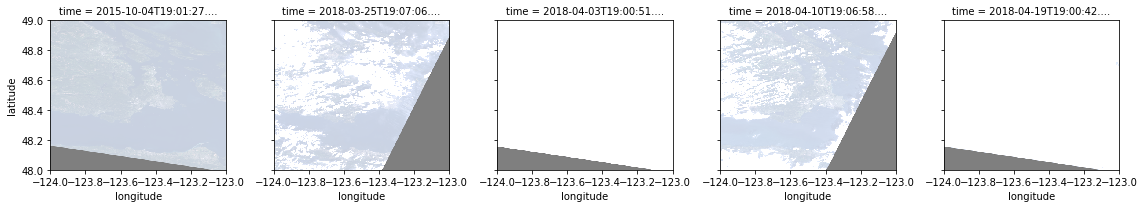

In [52]:
data = mask_invalid_data(data)

fake_saturation = 10000
rgb = data.to_array(dim='color')
rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1]))  # make 'color' the last dimension
rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))  # mask out pixels where any band is 'saturated'
rgb /= fake_saturation  # scale to [0, 1] range for imshow

rgb.plot.imshow(x=data.crs.dimensions[1], y=data.crs.dimensions[0],
                col='time', col_wrap=5, add_colorbar=False)